In [1]:
# from tkinter import *
import tkinter as tk
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt


#custom module
from dataPrep import load_dataset, load_sample_dataset
from dataPrep import prep_dataset, rand_mini_batches
from finalModelUtils import *
from ffnn import *

In [2]:
#loading complete dataset
train_x_orig, train_y_orig, dev_x_orig,dev_y_orig,test_x_orig,test_y_orig = load_dataset()

In [3]:
#loading Sample dataset
sample_size = 100
train_x_sample, train_y_sample, dev_x_sample, dev_y_sample, test_x_sample, test_y_sample = load_sample_dataset(sample_size)


In [4]:
# Preparing the Dataset (Flattening and Normalizing)
train_x_norm,train_y_encoded, dev_x_norm,dev_y_encoded, test_x_norm, test_y_encoded = prep_dataset(train_x_sample, train_y_sample, dev_x_sample, dev_y_sample, test_x_sample, test_y_sample)


In [5]:
# loaded_params = load_model(file_name = "final_model_adam_dropout") ##past saved model
loaded_params = load_model(file_name = "2020-05-05 08:23:50.731266 test_final_model_adam")
trained_params = loaded_params["parameters"]
trained_hyper_params = loaded_params["hyperParams"]

In [6]:
L = len(trained_params) // 2
print("Total Layers %d: "%L)

for l in range(L):
    print(trained_params["W" + str(l+1)].shape)
print(trained_hyper_params)

Total Layers 3: 
(800, 784)
(300, 800)
(10, 300)
{'learning_rate': 0.001, 'num_epoch': 25, 'mini_batch_size': 128, 'lambda': 0.9, 'keep_probs': [0.8, 0.8], 'beta1': 0.9, 'beta2': 0.999, 'epsilon': 1e-08}


In [7]:
prediction_train,train_acc,_ = predict(train_x_norm, train_y_encoded,trained_params)
prediction_dev,dev_acc, _ = predict(dev_x_norm, dev_y_encoded,trained_params)
prediction_test,test_acc,_ = predict(test_x_norm, test_y_encoded,trained_params)

print("+===========+===========+===============+")
print("| Dataset   | Accuracy \t| Error Rate \t|") 
print("+===========+===========+===============+")
print("| Training  | %.4f \t| %.4f \t|"%(train_acc, 1-train_acc))
print("| Dev       | %.4f \t| %.4f \t|"%(dev_acc, 1-dev_acc))      
print("| Test      | %.4f \t| %.4f \t|"%(test_acc, 1-test_acc))      

print("+===========+===========+===============+")

+===========+===========+===============+
| Dataset   | Accuracy 	| Error Rate 	|
+===========+===========+===============+
| Training  | 0.9988 	| 0.0012 	|
| Dev       | 0.9828 	| 0.0172 	|
| Test      | 0.9814 	| 0.0186 	|
+===========+===========+===============+


In [8]:
from PIL import Image
from dataPrep import one_hot_encoding

(0, 9)

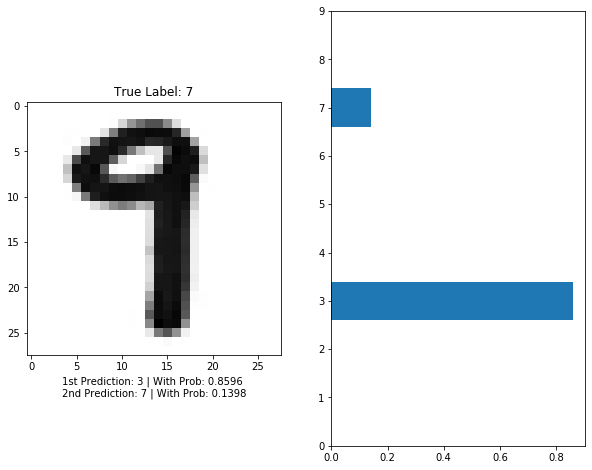

In [109]:
image_name = "9_2.jpg" 
label = np.array([7]).reshape(1,1)

fname = "dataset/" + image_name

# def classify_image(fname):
image_data = 255 - np.asarray(Image.open(fname).convert('L').resize((28,28)))
image_flattened = image_data.reshape(image_data.shape[0]*image_data.shape[1],-1)
image_norm =(image_flattened/255.)

label_encoded = one_hot_encoding(label) ## needs to be excluded in future from here and predict function

prediction,acc,_ = predict(image_norm, label_encoded, trained_params)

#     return prediction


# prediction  = classify_image(fname)
first_lbl, first_prob = prediction["First Prediction"]
sec_lbl, sec_prob = prediction["Second Prediction"]

fig,ax = plt.subplots(nrows =1 , ncols =2 , figsize = (10,8))
fig.subplots_adjust(hspace=0)

ax[0].set_title("True Label: "+ str(label.squeeze()))
ax[0].set_xlabel("1st Prediction: %d | With Prob: %.4f \n2nd Prediction: %d | With Prob: %.4f"%(first_lbl, first_prob, sec_lbl, sec_prob))
im = ax[0].imshow(image_data, interpolation ='nearest',cmap='binary')

# fig.colorbar(im)
ax[1].barh([first_lbl.squeeze(),sec_lbl.squeeze() ],[first_prob.squeeze(),sec_prob.squeeze()])
ax[1].set_ylim(bottom = 0, top = 9)

In [115]:
import tkinter as tk
from tkinter.filedialog import askopenfilename
from PIL import ImageTk



def upload_image():
    filename = askopenfilename() # show an "Open" dialog box and return the path to the selected file
    imageUpload = Image.open(filename).resize((250, 250), Image.ANTIALIAS) 
    
    #extracting the image name from the file path and displaying it
    image_name = filename.split("/")[-1]
    fileNamelbl = tk.Label(uploadPane, text = image_name, bg = "white")
    fileNamelbl.place(relx = 0.4, rely = 0.05 , relwidth = 0.55, relheight = 0.08 )
    return imageUpload

def preview_image():
    image = upload_image()
    imageRender = ImageTk.PhotoImage(image)
    img = tk.Label(previewCanvas, image=imageRender)
    img.image = imageRender
    img.place(relx = 0, rely = 0, relwidth = 1, relheight = 1 )
    global image_data
    image_data = 255 - np.asarray(image.convert('L').resize((28,28)))
    

    
def classify():
#     assert(image_data.all() != np.zeros((28,28)).all()), "Image not Uploaded"
    label = np.array([0]).reshape(1,1) ## will be removed when predict function is optimized.. not needed now
   
    image_flattened = image_data.reshape(image_data.shape[0]*image_data.shape[1],-1)
    image_norm =(image_flattened/255.)

    label_encoded = one_hot_encoding(label) ## needs to be excluded in future from here and predict function

    prediction,acc,_ = predict(image_norm, label_encoded, trained_params)

    first_lbl, first_prob = prediction["First Prediction"]
    sec_lbl, sec_prob = prediction["Second Prediction"]
    
    firstPredLbl = tk.Label(firstPredictionPane, text = first_lbl.squeeze(), font=("Helvetica", 48))
    firstPredLbl.place(relx = 0, rely = 0, relwidth = 1, relheight = 0.6 )
        
    firstPredProb = tk.Label(firstPredictionPane, text = "Prob: %.4f"%first_prob.squeeze(), font=("Helvetica", 24))
    firstPredProb.place(relx = 0, rely = 0.6, relwidth = 1, relheight = 0.4 )

    fsecondPredLbl = tk.Label(secondPredictionPane, text = "Second Guess: \n%d"%sec_lbl.squeeze(), font=("Helvetica", 48))
    fsecondPredLbl.place(relx = 0, rely = 0, relwidth = 1, relheight = 0.6 )
        
    fsecondPredProb = tk.Label(secondPredictionPane, text = "Prob: %.4f"%sec_prob.squeeze(), font=("Helvetica", 24))
    fsecondPredProb.place(relx = 0, rely = 0.6, relwidth = 1, relheight = 0.4 )

    
def clear():
    drawCanvas.delete("all")
    
    

def draw(event):
    x = event.x
    y = event.y
    r = 5
    drawCanvas.create_oval( x-r, y-r, x+r, y+r,  fill='black',width = 8)
      
        

root = tk.Tk()
HEIGHT = 1000
WIDTH = 1000
image_data = np.zeros((28,28))
# x_prev,y_prev = 0, 0


root.geometry(str(WIDTH) + "x" + str(HEIGHT) )
root.resizable(width=False, height=False)

#creating Frames
imageFrame = tk.Frame(root, bg = "red") #contains ways to input image
actionFrame = tk.Frame(root, bg = "blue") # contains options for result and buttons for action
predictionFrame = tk.Frame(root, bg = "white") # consists of result of the prediction

imageFrame.place(relx=0  ,rely=0 ,relwidth = 1, relheight = 0.6)
actionFrame.place(relx=0  ,rely=0.6 ,relwidth = 1, relheight = 0.1)
predictionFrame.place(relx =0 , rely =0.7 , relwidth = 1, relheight = 0.3)

#Image Frame
inputLbl = tk.Label(imageFrame, text="Input Image", font=("Helvetica", 24))
inputLbl.place(relx = 0, rely = 0, relwidth = 1, relheight = 0.1 )

##Creating Panes for Image Input
drawPane = tk.PanedWindow(imageFrame,bg = "yellow" )
uploadPane = tk.PanedWindow(imageFrame,bg = "green" )

drawPane.place(relx = 0, rely = 0.1, relwidth = 0.5, relheight = 0.9)
uploadPane.place(relx = 0.5, rely = 0.1, relwidth = 0.5, relheight = 0.9)

## drawPane
#creating components for drawPan
drawLbl = tk.Label(drawPane, text="Draw a Digit")
drawCanvas = tk.Canvas(drawPane,bg = "white", cursor="cross")

drawLbl.place(relx = 0.05, rely = 0.05, relwidth = 0.3, relheight = 0.08 )
drawCanvas.place(relx = 0.05, rely = 0.15, relwidth = 0.9, relheight = 0.8 )
# drawCanvas.bind("<Button-1>", get_prev_xy)
drawCanvas.bind("<B1-Motion>", draw)

##uploadPane
uploadBtn = tk.Button(uploadPane, text = "Upload", command = preview_image )
previewCanvas = tk.Canvas(uploadPane, bg = "white")
previewlbl = tk.Label(previewCanvas, text = "Preview")

uploadBtn.place(relx = 0.05, rely = 0.05 , relwidth = 0.3, relheight = 0.08 )
previewCanvas.place(relx = 0.05, rely = 0.15, relwidth =0.9, relheight = 0.8 )
previewlbl.place(relx = 0, rely = 0, relwidth = 1, relheight = 1 )

# #getting the uploaded image
# image = uploadBtn.cget("command") ##problem unable to get image data
# print(type(image))

#Action Frame

optionPane = tk.PanedWindow(actionFrame, bg = "green")
buttonPane = tk.PanedWindow(actionFrame,bg = "white" )

optionPane.place(relx = 0, rely = 0, relwidth = 0.5, relheight = 1)
buttonPane.place(relx = 0.5, rely = 0, relwidth = 0.5, relheight = 1)

# #optionPane
# var1 = IntVar()
# secondGuessCheck = tk.Checkbutton(optionPane,text = "Display Second Guess", variable = var1, onvalue = 1, offvalue = 0)
# secondGuessCheck.place(relx = 0.1, rely = 0.1, relwidth = 0.8, relheight = 0.4 )




#Prediction Frame
predictLbl = tk.Label(predictionFrame, text="Prediction", font=("Helvetica", 24))
predictLbl.place(relx = 0, rely = 0, relwidth = 1, relheight = 0.2 )

firstPredictionPane = tk.PanedWindow(predictionFrame,bg = "white" )
secondPredictionPane = tk.PanedWindow(predictionFrame,bg = "yellow" )

firstPredictionPane.place(relx = 0, rely = 0.2, relwidth = 0.5, relheight = 0.8)
secondPredictionPane.place(relx = 0.5, rely = 0.2, relwidth = 0.5, relheight = 0.8)



## buttonPane
classifyBtn = tk.Button(buttonPane,text = "Predict", command = classify)
button_clear = tk.Button(buttonPane, text = "Clear", command = clear)

classifyBtn.place(relx = 0.05, rely = 0.1, relwidth = 0.45, relheight = 0.8 )
button_clear.place(relx = 0.55, rely = 0.1, relwidth = 0.40, relheight = 0.8)




root.mainloop()








https://ubuntuforums.org/showthread.php?t=448160&s=05d56415c41bc81c2da564b5bb8d007b&p=2681009#post2681009